In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<Figure size 1080x720 with 0 Axes>

In [2]:
filename = 'Tingkat Ketergantungan Pada Gadget (Jawaban).csv'

In [3]:
data = pd.read_csv(filename)
data.head()

,Timestamp,Nama,Usia,Gelisah saat tidak ada Gadget,Keberatan Melepas Gadget,Gadget saat aktivitas lain,sering memeriksa feed,skala periksa feed,Lama memakai gadget dalam sehari,kegiatan paling lama saat gadgetan,biaya ngegadget,penghasilan dari gadget,gadget saat luang,langsung beli gadget saat rusak
0,12/5/2021 22:17:20,Rexion,18,4,Ya Ya Ya,"Ya, tentu",G,4,> 5 jam,"Nonton Film , Kartun , etc",35,NaN,Ya,Ya
1,12/5/2021 22:18:50,Lexion,19,2,Tidak,"Ya, tentu",G,1,> 5 jam,produktif,50,NaN,Tidak,Tidak
2,12/6/2021 9:22:14,Chinta 'Aliyyah Candramaya,20,2,Tidak,"Ya, tentu",Y,4,> 5 jam,produktif,100,1500,Ya,Tidak
3,12/6/2021 9:40:01,Shafira hemalia berliana putri,19,2,Tidak,"Ya, tentu",Y,3,> 5 jam,"Mantengin Medsos (IG, Twitter, FB, Tiktok, etc)",49000,2.8jt,Ya,Ya
4,12/6/2021 9:40:05,Stefany Amanda Kurniawa,18,2,Ya Ya Ya,"Ya, tentu",G,1,> 5 jam,"Nonton Film , Kartun , etc",Pake wifi,NaN,Tidak,Tidak


In [4]:
data = data.drop(['Timestamp','Nama','penghasilan dari gadget','biaya ngegadget'],axis=1)
data.head()

,Usia,Gelisah saat tidak ada Gadget,Keberatan Melepas Gadget,Gadget saat aktivitas lain,sering memeriksa feed,skala periksa feed,Lama memakai gadget dalam sehari,kegiatan paling lama saat gadgetan,gadget saat luang,langsung beli gadget saat rusak
0,18,4,Ya Ya Ya,"Ya, tentu",G,4,> 5 jam,"Nonton Film , Kartun , etc",Ya,Ya
1,19,2,Tidak,"Ya, tentu",G,1,> 5 jam,produktif,Tidak,Tidak
2,20,2,Tidak,"Ya, tentu",Y,4,> 5 jam,produktif,Ya,Tidak
3,19,2,Tidak,"Ya, tentu",Y,3,> 5 jam,"Mantengin Medsos (IG, Twitter, FB, Tiktok, etc)",Ya,Ya
4,18,2,Ya Ya Ya,"Ya, tentu",G,1,> 5 jam,"Nonton Film , Kartun , etc",Tidak,Tidak


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Usia                                75 non-null     object
 1   Gelisah saat tidak ada Gadget       75 non-null     int64 
 2   Keberatan Melepas Gadget            75 non-null     object
 3   Gadget saat aktivitas lain          75 non-null     object
 4   sering memeriksa feed               75 non-null     object
 5   skala periksa feed                  75 non-null     int64 
 6   Lama memakai gadget dalam sehari    75 non-null     object
 7   kegiatan paling lama saat gadgetan  75 non-null     object
 8   gadget saat luang                   75 non-null     object
 9   langsung beli gadget saat rusak     75 non-null     object
dtypes: int64(2), object(8)
memory usage: 6.0+ KB


In [6]:
encoder = LabelEncoder()

In [7]:
encodes_target = [
    'Gelisah saat tidak ada Gadget','Keberatan Melepas Gadget',
    'Gadget saat aktivitas lain','sering memeriksa feed',
    'skala periksa feed','Lama memakai gadget dalam sehari',
    'kegiatan paling lama saat gadgetan','gadget saat luang',
    'langsung beli gadget saat rusak'
    ]

In [8]:
for item in encodes_target:
    data[item] = encoder.fit_transform(data[item])


data.head()

,Usia,Gelisah saat tidak ada Gadget,Keberatan Melepas Gadget,Gadget saat aktivitas lain,sering memeriksa feed,skala periksa feed,Lama memakai gadget dalam sehari,kegiatan paling lama saat gadgetan,gadget saat luang,langsung beli gadget saat rusak
0,18,3,1,1,0,3,3,2,1,1
1,19,1,0,1,0,0,3,3,0,0
2,20,1,0,1,1,3,3,3,1,0
3,19,1,0,1,1,2,3,1,1,1
4,18,1,1,1,0,0,3,2,0,0


In [9]:
data['Usia'] = data['Usia'].str.extract(r'(\d+)')
data['Usia'] = data['Usia'].astype('int64')

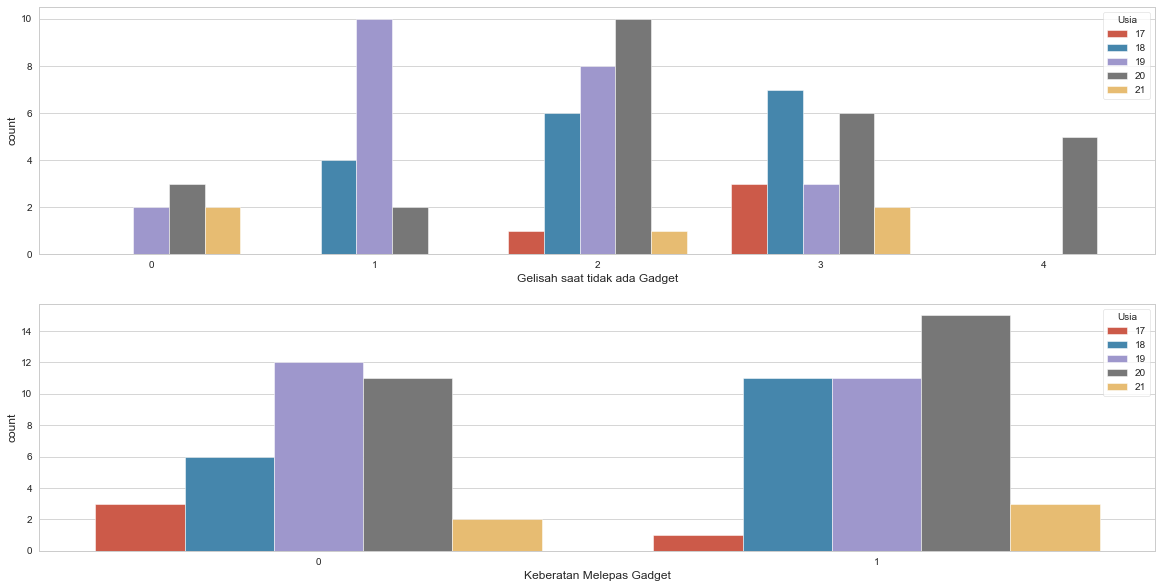

In [13]:
fig,axs = plt.subplots(2,figsize=(20,10))
sns.countplot(data=data,x='Gelisah saat tidak ada Gadget',hue='Usia',ax=axs[0])
sns.countplot(data=data,x='Keberatan Melepas Gadget',hue='Usia',ax=axs[1])
plt.show()

Well the data is pretty Clean now

In [14]:
from kmodes.kmodes import KModes

In [15]:
features = data.drop(columns=['Usia'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 305.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 242.0
Run 1, iteration: 2/100, moves: 7, cost: 242.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18, cost: 252.0
Run 2, iteration: 2/100, moves: 14, cost:

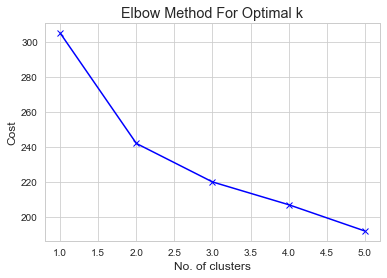

In [22]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(features)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Its a hard Choice tbh :'/

In [23]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(features)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 229.0
Run 1, iteration: 2/100, moves: 3, cost: 229.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 223.0
Run 2, iteration: 2/100, moves: 6, cost: 223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 226.0
Run 3, iteration: 2/100, moves: 1, cost: 226.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17, cost: 225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 16, cost: 232.0
Run 5, iteration: 2/100, moves: 2, cost: 232.0
Best run was number 2


array([2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 2, 2, 0, 1, 1], dtype=uint16)

In [24]:
data['Clusters'] = clusters
data.head()

,Usia,Gelisah saat tidak ada Gadget,Keberatan Melepas Gadget,Gadget saat aktivitas lain,sering memeriksa feed,skala periksa feed,Lama memakai gadget dalam sehari,kegiatan paling lama saat gadgetan,gadget saat luang,langsung beli gadget saat rusak,Clusters
0,18,3,1,1,0,3,3,2,1,1,2
1,19,1,0,1,0,0,3,3,0,0,1
2,20,1,0,1,1,3,3,3,1,0,0
3,19,1,0,1,1,2,3,1,1,1,0
4,18,1,1,1,0,0,3,2,0,0,1


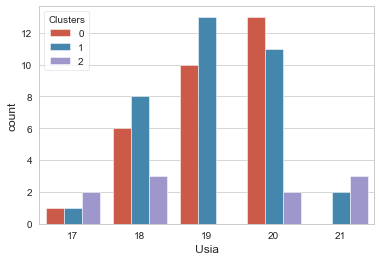

In [25]:
# fig,axs = plt.subplots(2,figsize=(20,10))
sns.countplot(data=data,x='Usia',hue='Clusters')
# sns.countplot(data=data,x='Keberatan Melepas Gadget',hue='Usia',ax=axs[1])
plt.show()